# mor

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2755
True     1942
Name: count, dtype: int64

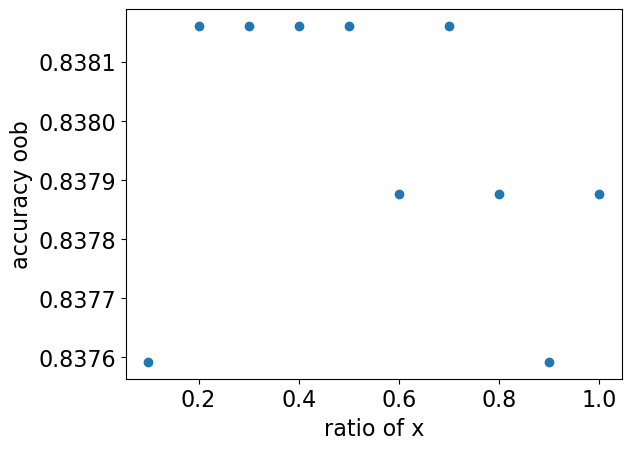

最適なx: 0.2


importance
MaxEStateIndex       0.011451
MinAbsEStateIndex    0.046124
MinEStateIndex       0.062635
qed                  0.015084
SPS                  0.016026
...                       ...
fr_Ndealkylation2    0.012595
fr_bicyclic          0.001165
fr_piperdine         0.002601
fr_quatN             0.001749
fr_unbrch_alkane     0.003031

[68 rows x 1 columns]

False  True
False   1798   268
True     245  1211

False  True
False    585   104
True      94   392

正解率(Accuracy) : 訓練 0.854344122657581, 検証 0.8314893617021276
適合率(Precision) : 訓練 0.8187964841108857, 検証 0.7903225806451613
再現率(Recall) : 訓練 0.8317307692307693, 検証 0.8065843621399177
F1スコア : 訓練 0.8252129471890971, 検証 0.7983706720977597


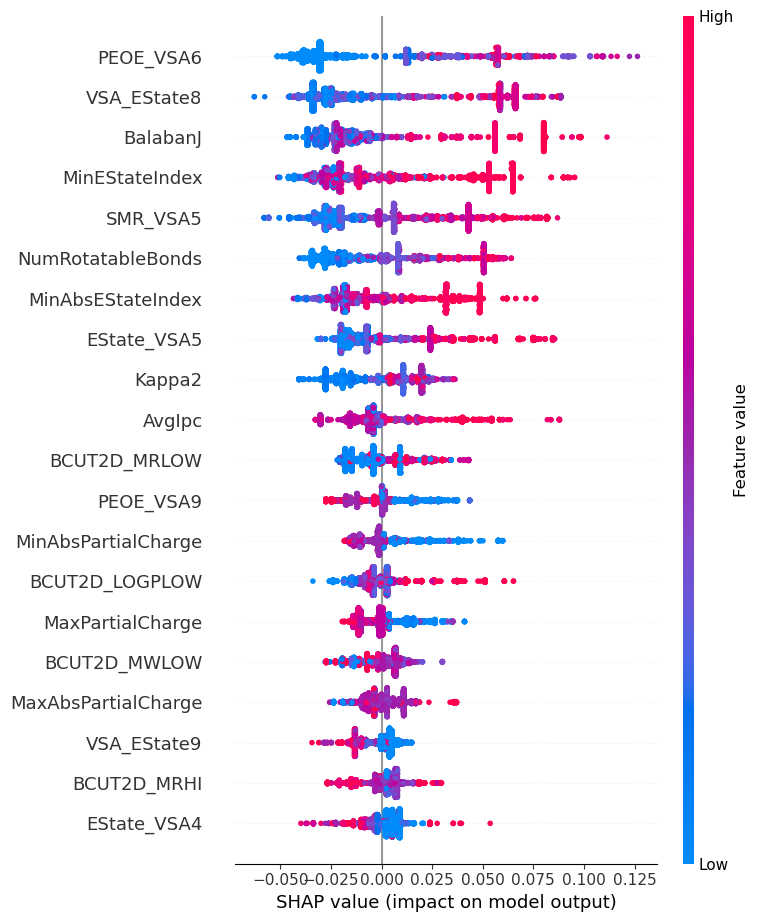

In [1]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 84].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# bea

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951    False
29952    False
29977     True
29978     True
Name: bea, Length: 4697, dtype: object

bea
False    4233
True      464
Name: count, dtype: int64

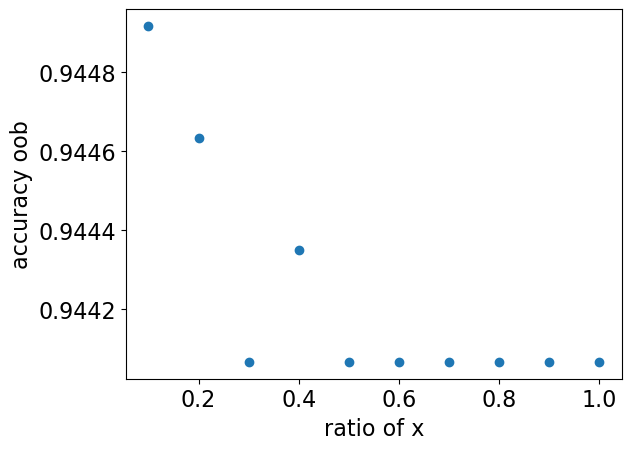

最適なx: 0.1


importance
MaxEStateIndex       0.032922
MinAbsEStateIndex    0.014966
MinEStateIndex       0.011702
qed                  0.027946
SPS                  0.015183
...                       ...
fr_Ndealkylation2    0.006078
fr_bicyclic          0.005343
fr_piperdine         0.005558
fr_quatN             0.002991
fr_unbrch_alkane     0.002081

[68 rows x 1 columns]

False  True
False   3031   143
True      38   310

False  True
False    990    69
True      17    99

正解率(Accuracy) : 訓練 0.9486087450312323, 検証 0.9268085106382978
適合率(Precision) : 訓練 0.6843267108167771, 検証 0.5892857142857143
再現率(Recall) : 訓練 0.8908045977011494, 検証 0.853448275862069
F1スコア : 訓練 0.7740324594257179, 検証 0.6971830985915493


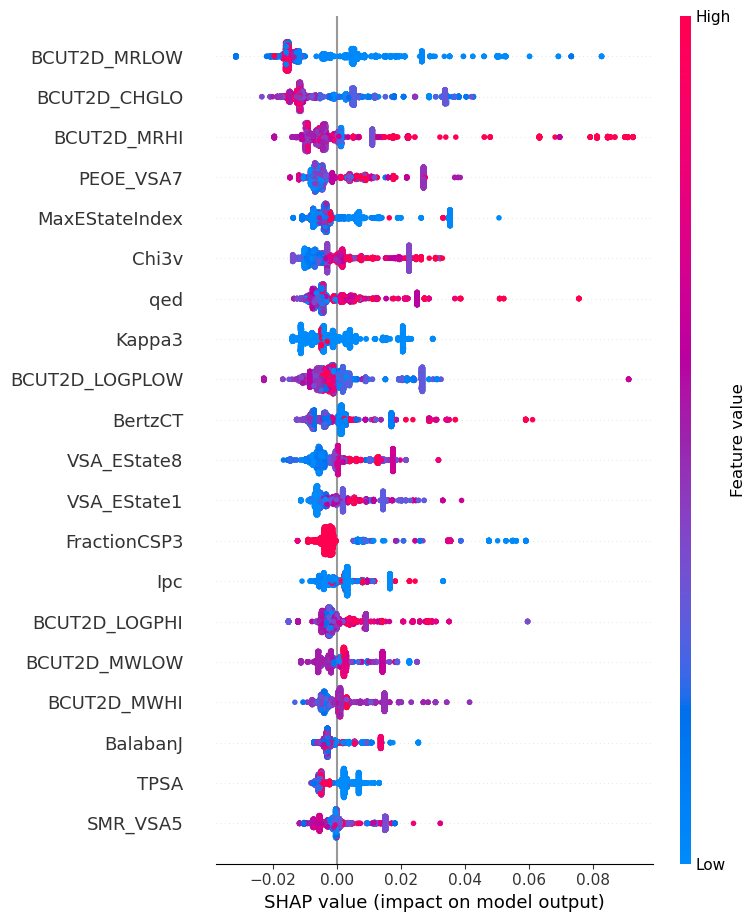

In [3]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 85].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtt

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: mtt, Length: 4697, dtype: object

mtt
False    4192
True      505
Name: count, dtype: int64

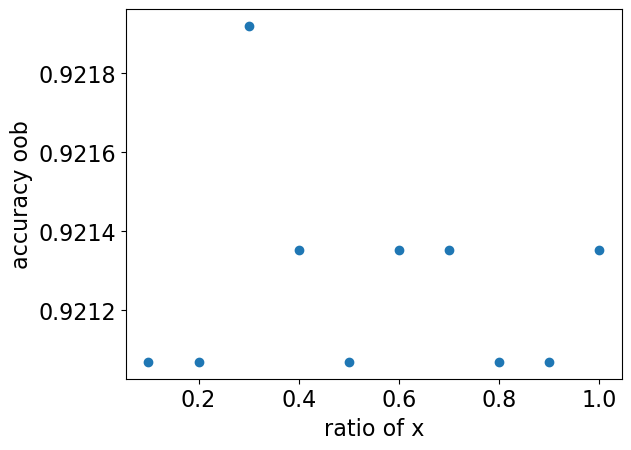

最適なx: 0.30000000000000004


importance
MaxEStateIndex       0.008926
MinAbsEStateIndex    0.036190
MinEStateIndex       0.049583
qed                  0.013438
SPS                  0.126839
...                       ...
fr_Ndealkylation2    0.002075
fr_bicyclic          0.000475
fr_piperdine         0.001167
fr_quatN             0.002820
fr_unbrch_alkane     0.013163

[68 rows x 1 columns]

False  True
False   3004   139
True      97   282

False  True
False    994    55
True      25   101

正解率(Accuracy) : 訓練 0.9329926178307779, 検証 0.9319148936170213
適合率(Precision) : 訓練 0.669833729216152, 検証 0.6474358974358975
再現率(Recall) : 訓練 0.7440633245382586, 検証 0.8015873015873016
F1スコア : 訓練 0.705, 検証 0.7163120567375887


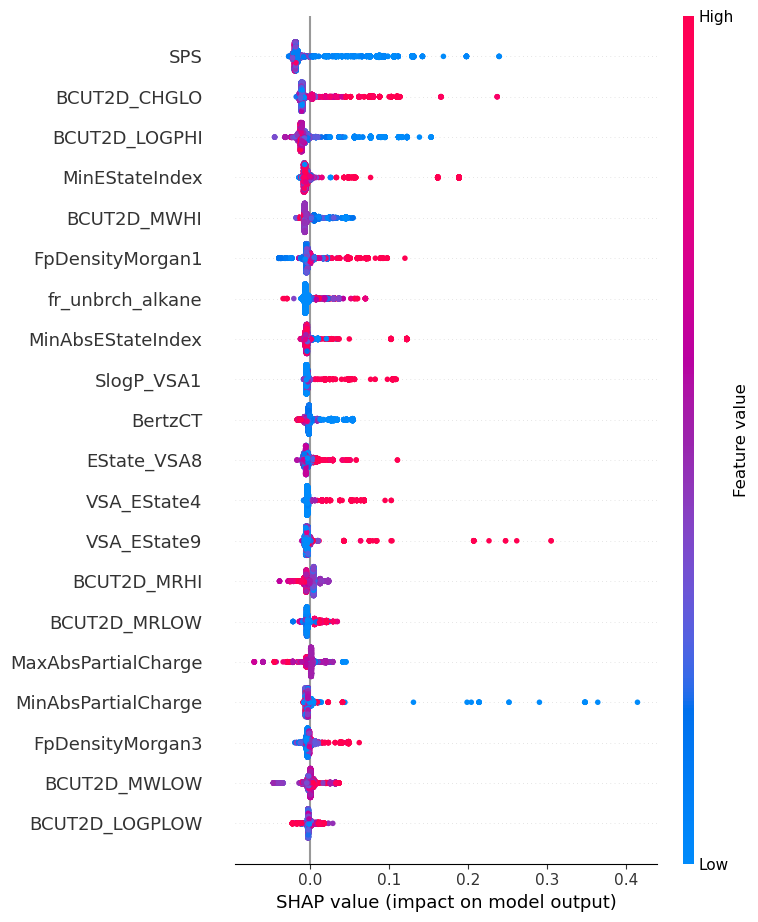

In [4]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 86].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# cas

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: cas, Length: 4697, dtype: object

cas
False    3357
True     1340
Name: count, dtype: int64

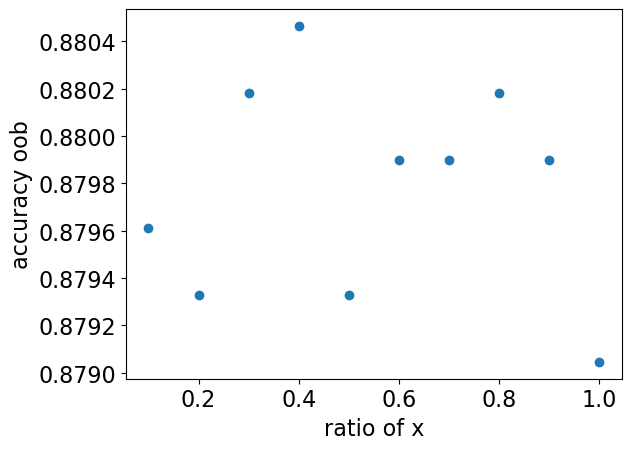

最適なx: 0.4


importance
MaxEStateIndex       0.009888
MinAbsEStateIndex    0.060606
MinEStateIndex       0.101011
qed                  0.013322
SPS                  0.023511
...                       ...
fr_Ndealkylation2    0.001011
fr_bicyclic          0.001546
fr_piperdine         0.000615
fr_quatN             0.000349
fr_unbrch_alkane     0.009920

[68 rows x 1 columns]

False  True
False   2385   132
True     233   772

False  True
False    801    39
True      96   239

正解率(Accuracy) : 訓練 0.8963657013060761, 検証 0.8851063829787233
適合率(Precision) : 訓練 0.8539823008849557, 検証 0.8597122302158273
再現率(Recall) : 訓練 0.7681592039800995, 検証 0.7134328358208956
F1スコア : 訓練 0.8088004190675746, 検証 0.7797716150081566


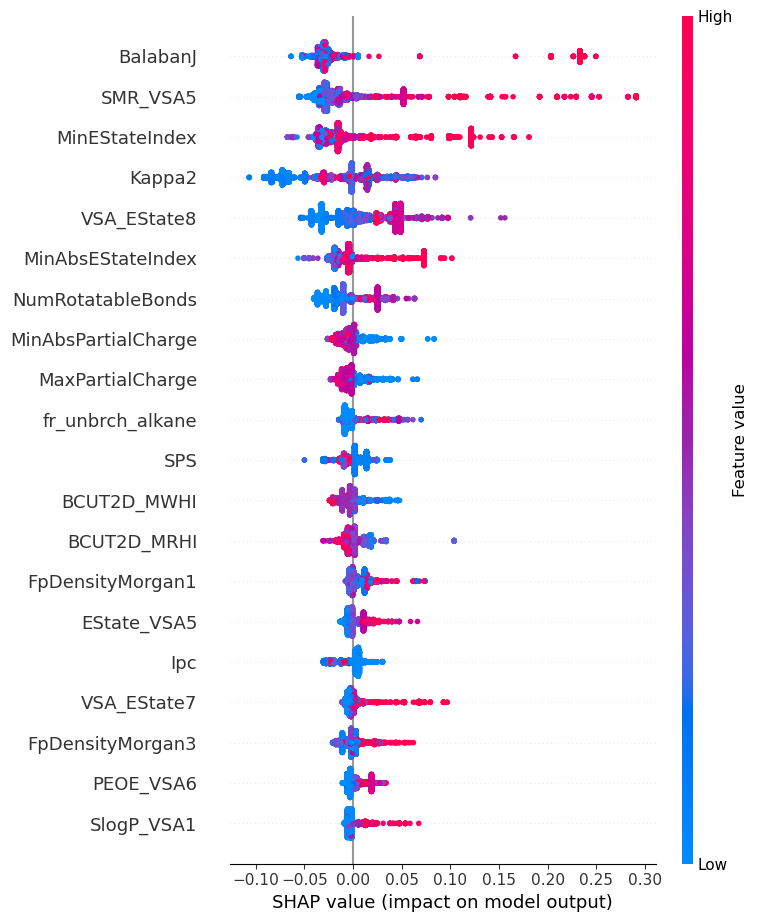

In [5]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 87].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d6r

249      False
250      False
251       True
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d6r, Length: 4697, dtype: object

d6r
False    3705
True      992
Name: count, dtype: int64

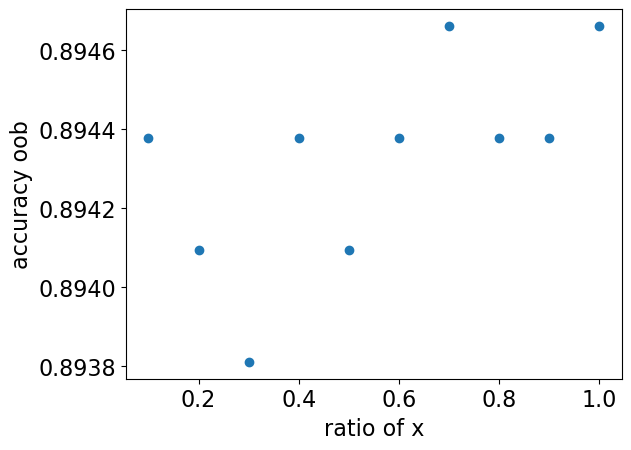

最適なx: 0.7000000000000001


importance
MaxEStateIndex       0.032933
MinAbsEStateIndex    0.010570
MinEStateIndex       0.011953
qed                  0.006605
SPS                  0.078476
...                       ...
fr_Ndealkylation2    0.001511
fr_bicyclic          0.000996
fr_piperdine         0.002288
fr_quatN             0.000445
fr_unbrch_alkane     0.000351

[68 rows x 1 columns]

False  True
False   2706    72
True     272   472

False  True
False    899    28
True      96   152

正解率(Accuracy) : 訓練 0.902328222600795, 検証 0.894468085106383
適合率(Precision) : 訓練 0.8676470588235294, 検証 0.8444444444444444
再現率(Recall) : 訓練 0.6344086021505376, 検証 0.6129032258064516
F1スコア : 訓練 0.7329192546583851, 検証 0.7102803738317757


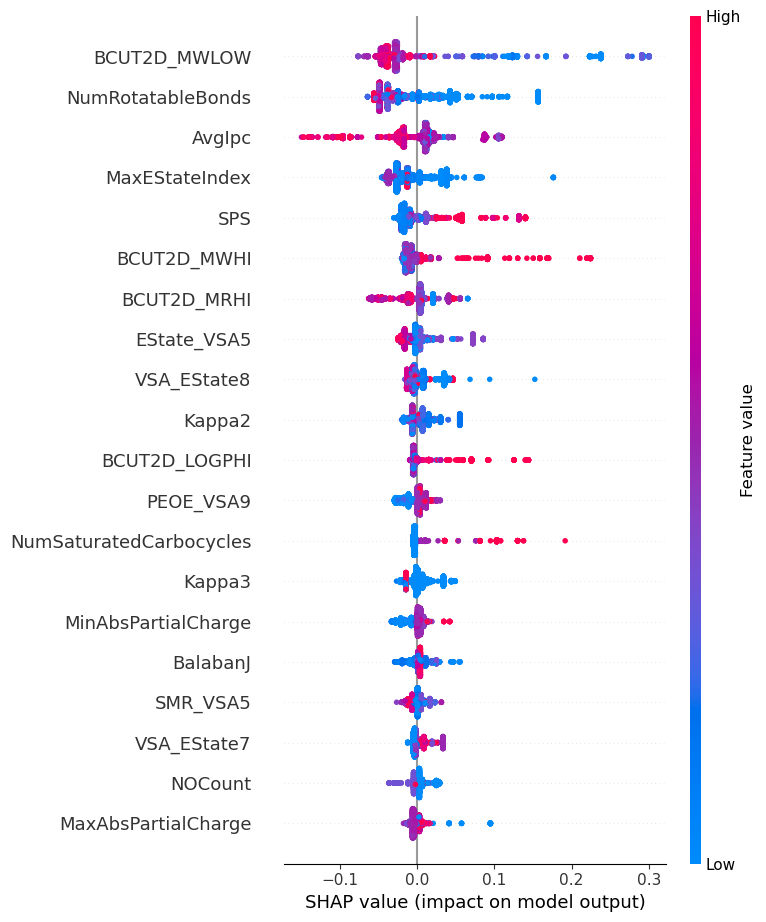

In [6]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 88].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# fer

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: fer, Length: 4697, dtype: object

fer
False    4455
True      242
Name: count, dtype: int64

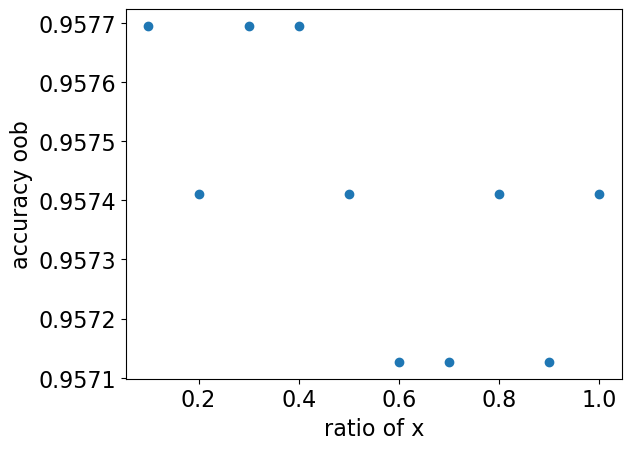

最適なx: 0.1


importance
MaxEStateIndex       0.023693
MinAbsEStateIndex    0.042367
MinEStateIndex       0.053311
qed                  0.023898
SPS                  0.020247
...                       ...
fr_Ndealkylation2    0.009221
fr_bicyclic          0.000163
fr_piperdine         0.001688
fr_quatN             0.003917
fr_unbrch_alkane     0.011852

[68 rows x 1 columns]

False  True
False   3306    35
True      98    83

False  True
False   1098    16
True      35    26

正解率(Accuracy) : 訓練 0.9622373651334469, 検証 0.9565957446808511
適合率(Precision) : 訓練 0.7033898305084746, 検証 0.6190476190476191
再現率(Recall) : 訓練 0.4585635359116022, 検証 0.4262295081967213
F1スコア : 訓練 0.5551839464882943, 検証 0.5048543689320388


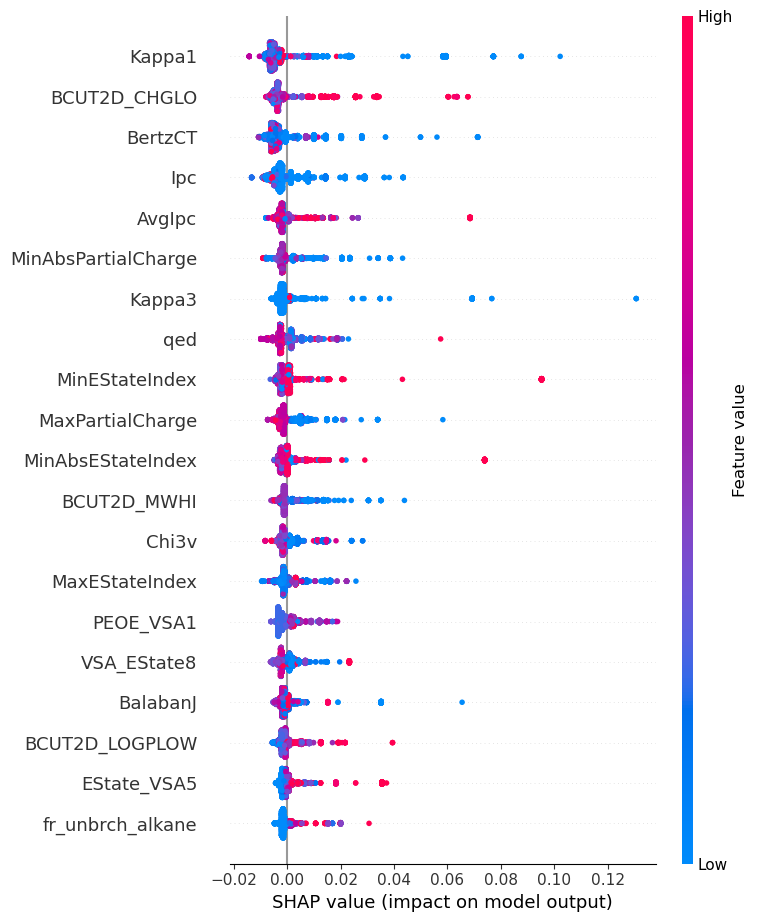

In [7]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 89].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mel

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: mel, Length: 4697, dtype: object

mel
False    3364
True     1333
Name: count, dtype: int64

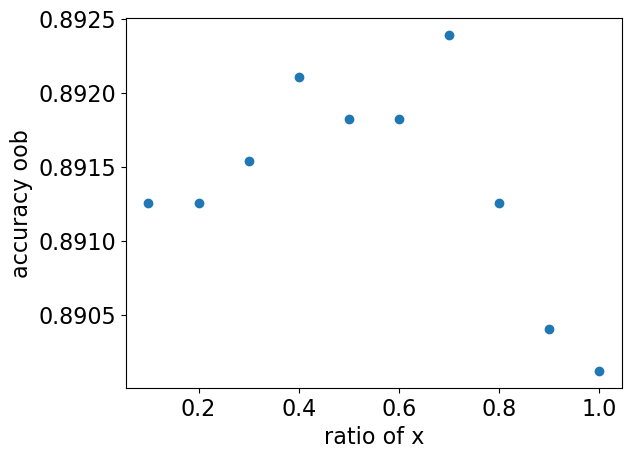

最適なx: 0.7000000000000001


importance
MaxEStateIndex       0.008512
MinAbsEStateIndex    0.027098
MinEStateIndex       0.028007
qed                  0.013311
SPS                  0.005667
...                       ...
fr_Ndealkylation2    0.000401
fr_bicyclic          0.000439
fr_piperdine         0.000389
fr_quatN             0.000292
fr_unbrch_alkane     0.001960

[68 rows x 1 columns]

False  True
False   2407   115
True     218   782

False  True
False    798    44
True      94   239

正解率(Accuracy) : 訓練 0.9054514480408858, 検証 0.8825531914893617
適合率(Precision) : 訓練 0.8717948717948718, 検証 0.8445229681978799
再現率(Recall) : 訓練 0.782, 検証 0.7177177177177178
F1スコア : 訓練 0.8244596731681603, 検証 0.775974025974026


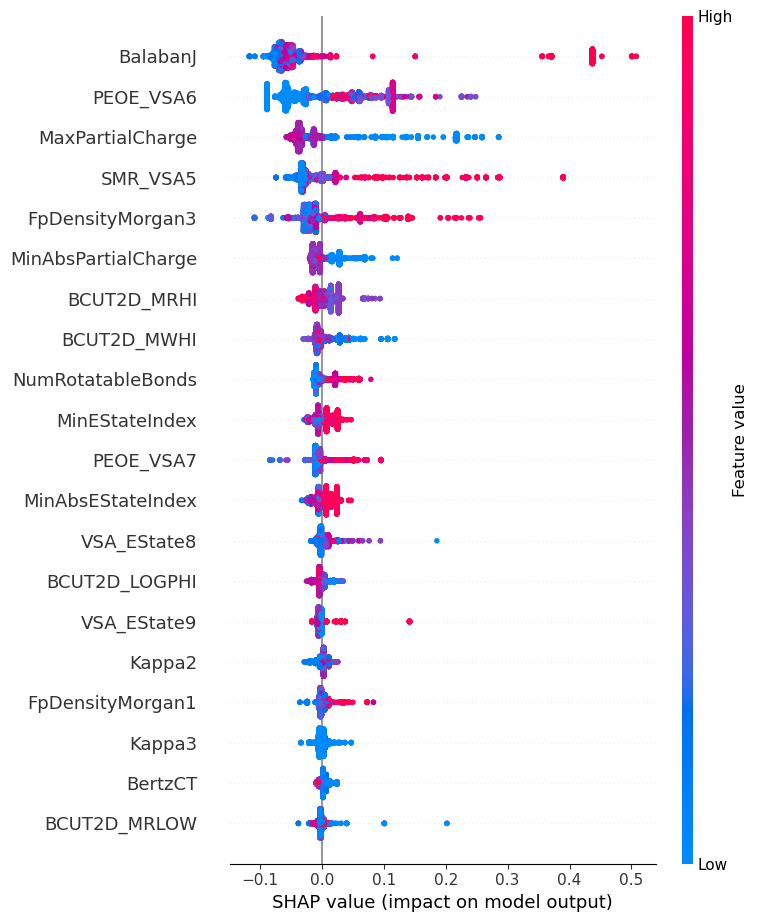

In [8]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 90].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mfi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: mfi, Length: 4697, dtype: object

mfi
False    3502
True     1195
Name: count, dtype: int64

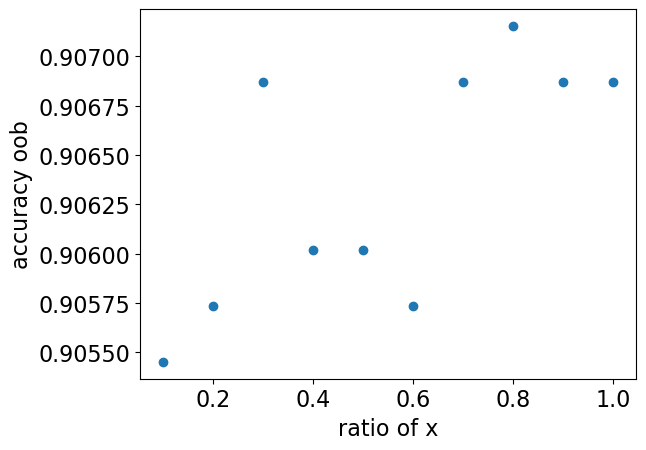

最適なx: 0.8


importance
MaxEStateIndex       0.005107
MinAbsEStateIndex    0.033451
MinEStateIndex       0.033829
qed                  0.022274
SPS                  0.005762
...                       ...
fr_Ndealkylation2    0.000432
fr_bicyclic          0.000337
fr_piperdine         0.000792
fr_quatN             0.000307
fr_unbrch_alkane     0.001863

[68 rows x 1 columns]

False  True
False   2525   101
True     182   714

False  True
False    837    39
True      72   227

正解率(Accuracy) : 訓練 0.9196479273140261, 検証 0.9055319148936171
適合率(Precision) : 訓練 0.8760736196319019, 検証 0.8533834586466166
再現率(Recall) : 訓練 0.796875, 検証 0.7591973244147158
F1スコア : 訓練 0.8345996493278784, 検証 0.8035398230088495


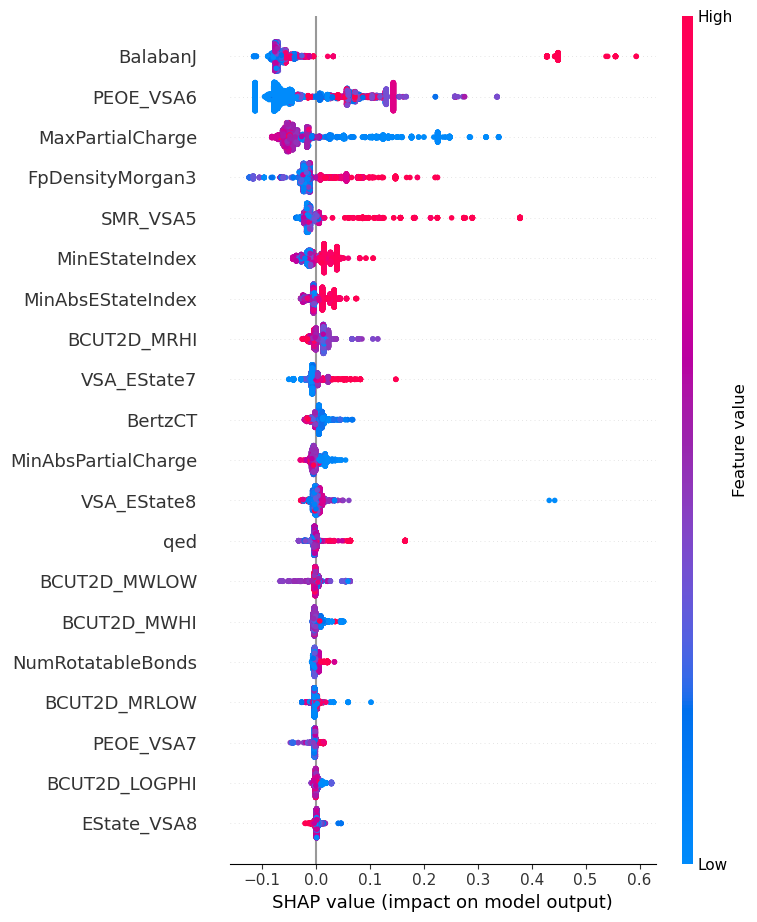

In [9]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 91].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# mtw

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951    False
29952    False
29977     True
29978     True
Name: mtw, Length: 4697, dtype: object

mtw
False    4051
True      646
Name: count, dtype: int64

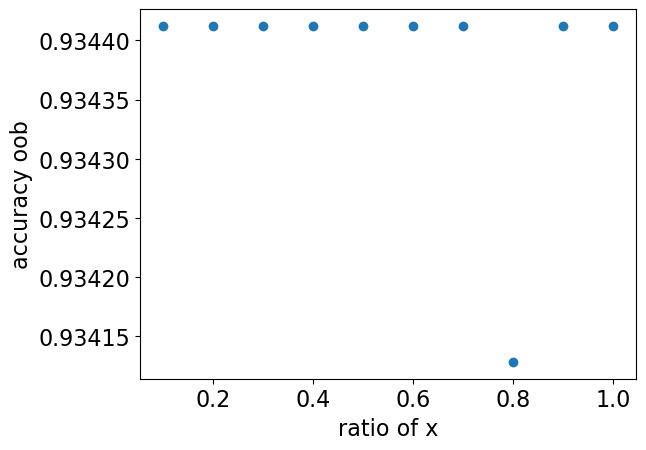

最適なx: 0.1


importance
MaxEStateIndex       0.043188
MinAbsEStateIndex    0.022297
MinEStateIndex       0.023233
qed                  0.026995
SPS                  0.014713
...                       ...
fr_Ndealkylation2    0.005363
fr_bicyclic          0.002836
fr_piperdine         0.003789
fr_quatN             0.002194
fr_unbrch_alkane     0.002709

[68 rows x 1 columns]

False  True
False   2897   141
True      59   425

False  True
False    968    45
True      34   128

正解率(Accuracy) : 訓練 0.9432140829074389, 検証 0.9327659574468085
適合率(Precision) : 訓練 0.7508833922261484, 検証 0.7398843930635838
再現率(Recall) : 訓練 0.878099173553719, 検証 0.7901234567901234
F1スコア : 訓練 0.8095238095238095, 検証 0.764179104477612


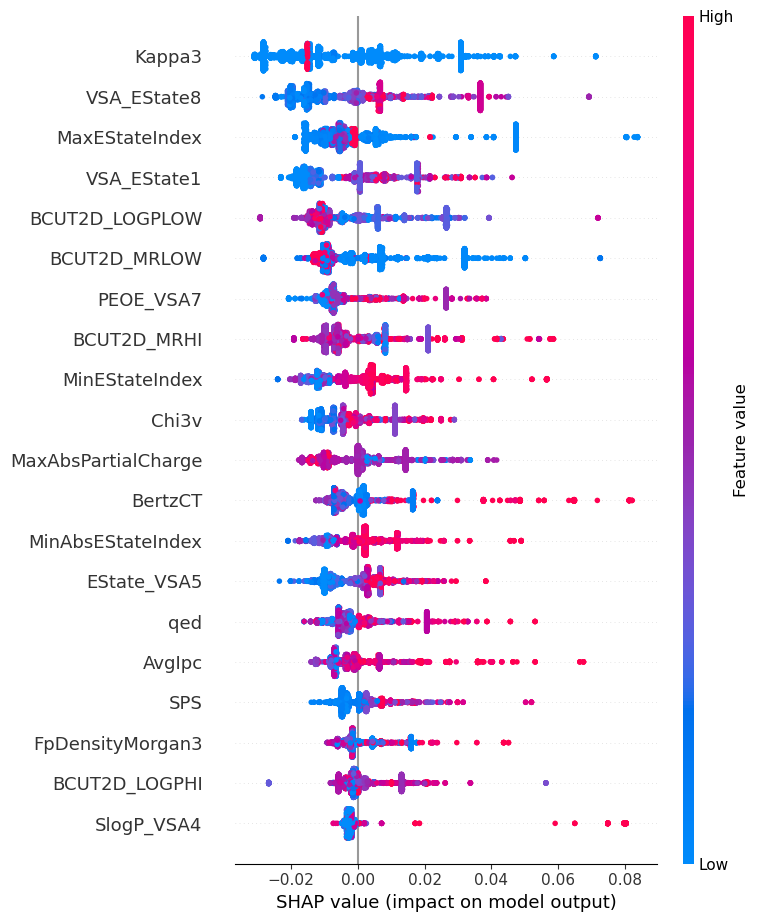

In [10]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 92].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# ton

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: ton, Length: 4697, dtype: object

ton
False    4306
True      391
Name: count, dtype: int64

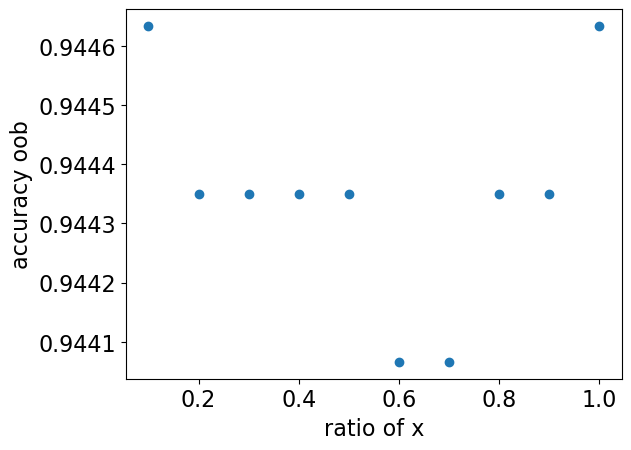

最適なx: 0.1


importance
MaxEStateIndex       0.017678
MinAbsEStateIndex    0.014209
MinEStateIndex       0.014603
qed                  0.015924
SPS                  0.060175
...                       ...
fr_Ndealkylation2    0.000221
fr_bicyclic          0.001703
fr_piperdine         0.000478
fr_quatN             0.008425
fr_unbrch_alkane     0.012592

[68 rows x 1 columns]

False  True
False   3145    84
True      84   209

False  True
False   1039    38
True      33    65

正解率(Accuracy) : 訓練 0.9522998296422487, 検証 0.9395744680851064
適合率(Precision) : 訓練 0.7133105802047781, 検証 0.6310679611650486
再現率(Recall) : 訓練 0.7133105802047781, 検証 0.6632653061224489
F1スコア : 訓練 0.7133105802047781, 検証 0.6467661691542289


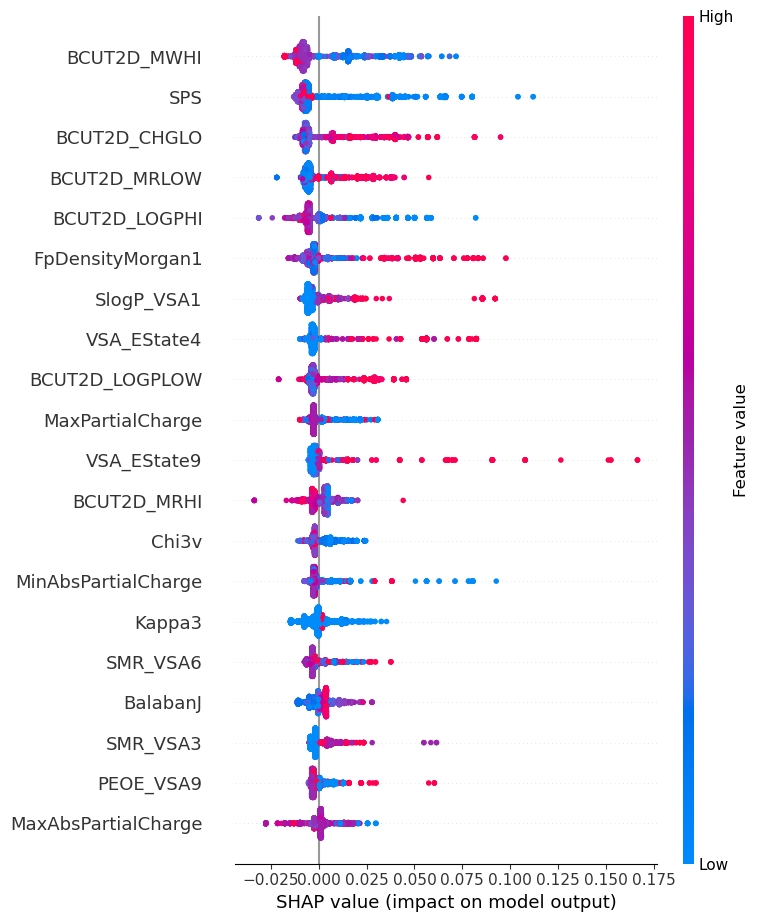

In [11]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 93].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# non

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: non, Length: 4697, dtype: object

non
False    4579
True      118
Name: count, dtype: int64

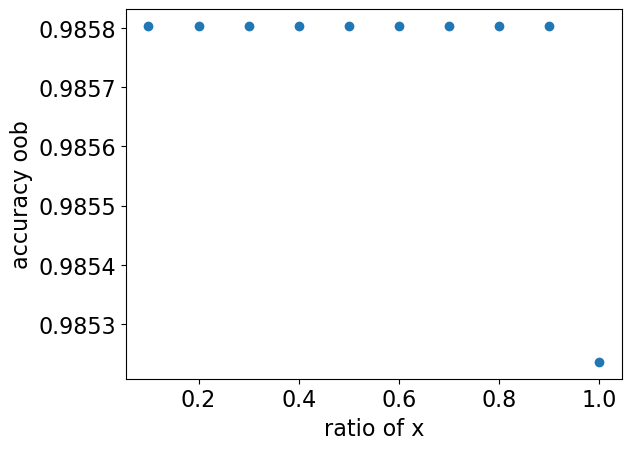

最適なx: 0.1


importance
MaxEStateIndex       0.027726
MinAbsEStateIndex    0.048506
MinEStateIndex       0.030604
qed                  0.029664
SPS                  0.020844
...                       ...
fr_Ndealkylation2    0.004724
fr_bicyclic          0.005337
fr_piperdine         0.007310
fr_quatN             0.012102
fr_unbrch_alkane     0.010535

[68 rows x 1 columns]

False  True
False   3412    22
True      23    65

False  True
False   1136     9
True       7    23

正解率(Accuracy) : 訓練 0.9872231686541738, 検証 0.9863829787234043
適合率(Precision) : 訓練 0.7471264367816092, 検証 0.71875
再現率(Recall) : 訓練 0.7386363636363636, 検証 0.7666666666666667
F1スコア : 訓練 0.7428571428571429, 検証 0.7419354838709677


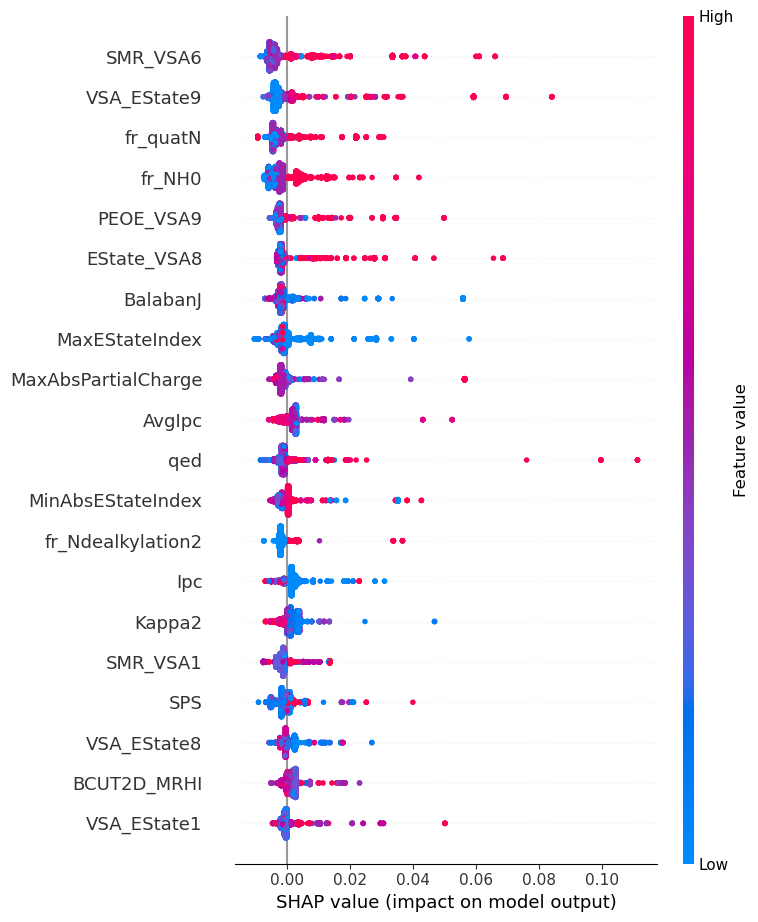

In [12]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 94].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# d8r

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d8r, Length: 4697, dtype: object

d8r
False    4671
True       26
Name: count, dtype: int64

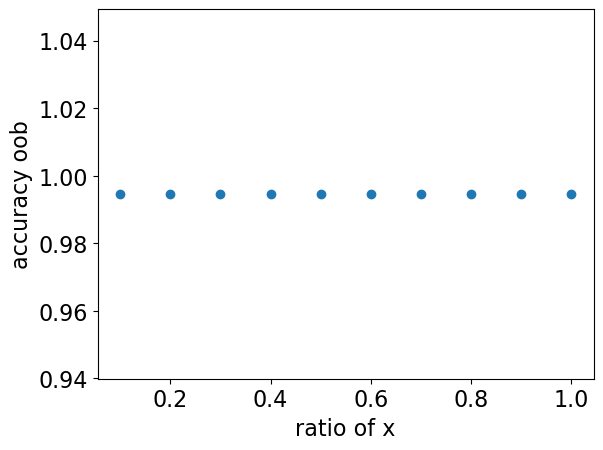

最適なx: 0.1


importance
MaxEStateIndex       0.019449
MinAbsEStateIndex    0.008594
MinEStateIndex       0.009539
qed                  0.014411
SPS                  0.001569
...                       ...
fr_Ndealkylation2    0.000000
fr_bicyclic          0.000000
fr_piperdine         0.000010
fr_quatN             0.000359
fr_unbrch_alkane     0.001405

[68 rows x 1 columns]

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


False  True
False   3503     0
True      19     0

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


False  True
False   1168     0
True       7     0

正解率(Accuracy) : 訓練 0.9946053378762068, 検証 0.9940425531914894
適合率(Precision) : 訓練 0.0, 検証 0.0
再現率(Recall) : 訓練 0.0, 検証 0.0
F1スコア : 訓練 0.0, 検証 0.0


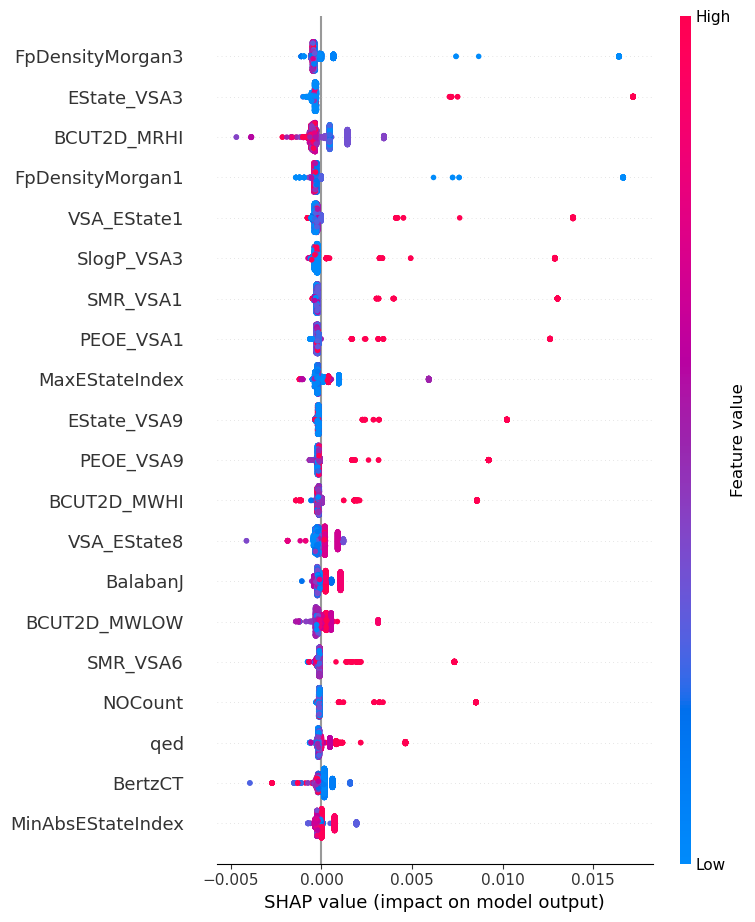

In [13]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 95].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# can

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: can, Length: 4697, dtype: object

can
False    4543
True      154
Name: count, dtype: int64

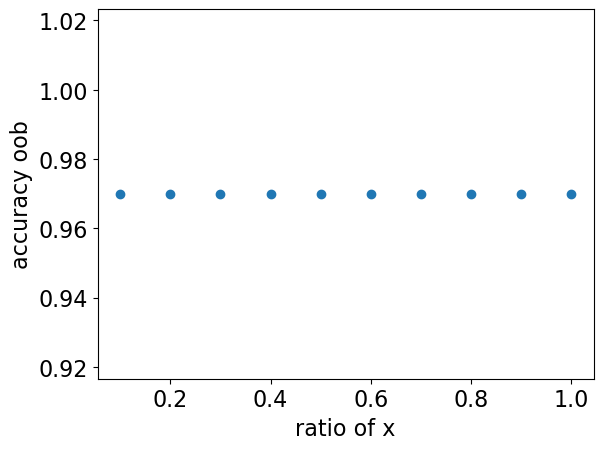

最適なx: 0.1


importance
MaxEStateIndex       0.028424
MinAbsEStateIndex    0.030306
MinEStateIndex       0.023676
qed                  0.015509
SPS                  0.013618
...                       ...
fr_Ndealkylation2    0.000839
fr_bicyclic          0.000093
fr_piperdine         0.000675
fr_quatN             0.005116
fr_unbrch_alkane     0.002356

[68 rows x 1 columns]

False  True
False   3377    30
True      73    42

False  True
False   1123    13
True      31     8

正解率(Accuracy) : 訓練 0.9707552526973311, 検証 0.9625531914893617
適合率(Precision) : 訓練 0.5833333333333334, 検証 0.38095238095238093
再現率(Recall) : 訓練 0.3652173913043478, 検証 0.20512820512820512
F1スコア : 訓練 0.44919786096256686, 検証 0.26666666666666666


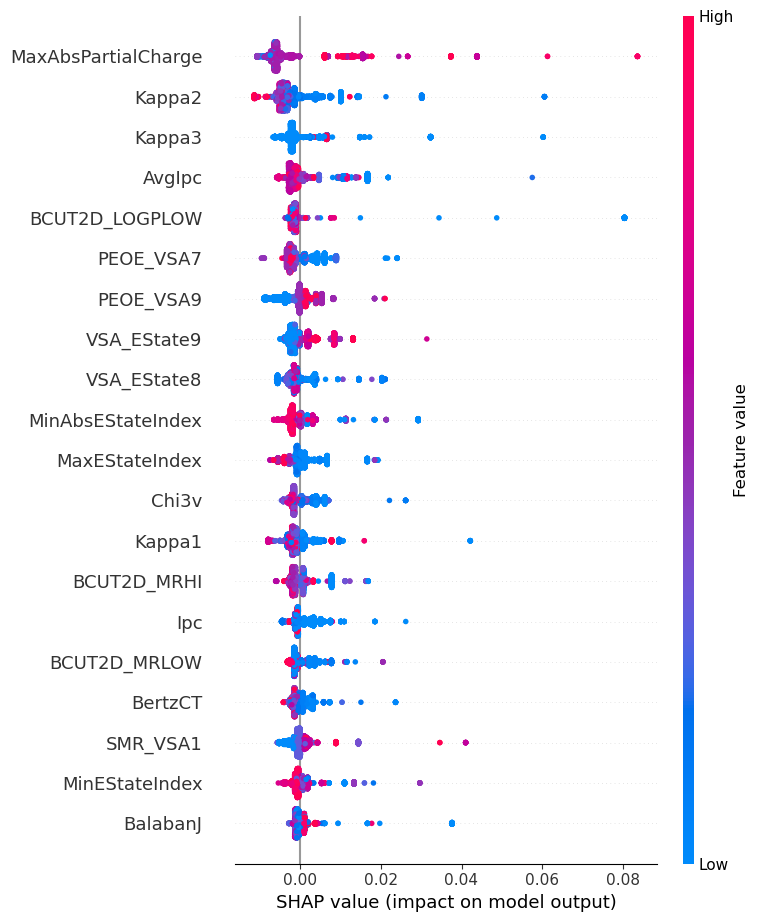

In [14]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 96].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# phi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: phi, Length: 4697, dtype: object

phi
False    4581
True      116
Name: count, dtype: int64

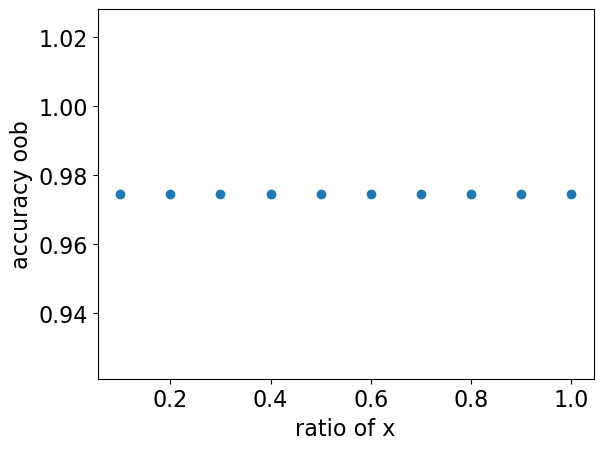

最適なx: 0.1


importance
MaxEStateIndex       0.080394
MinAbsEStateIndex    0.045785
MinEStateIndex       0.030561
qed                  0.008111
SPS                  0.007932
...                       ...
fr_Ndealkylation2    0.000000
fr_bicyclic          0.000969
fr_piperdine         0.000004
fr_quatN             0.004656
fr_unbrch_alkane     0.000815

[68 rows x 1 columns]

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


False  True
False   3435     0
True      87     0

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


False  True
False   1146     0
True      29     0

正解率(Accuracy) : 訓練 0.975298126064736, 検証 0.9753191489361702
適合率(Precision) : 訓練 0.0, 検証 0.0
再現率(Recall) : 訓練 0.0, 検証 0.0
F1スコア : 訓練 0.0, 検証 0.0


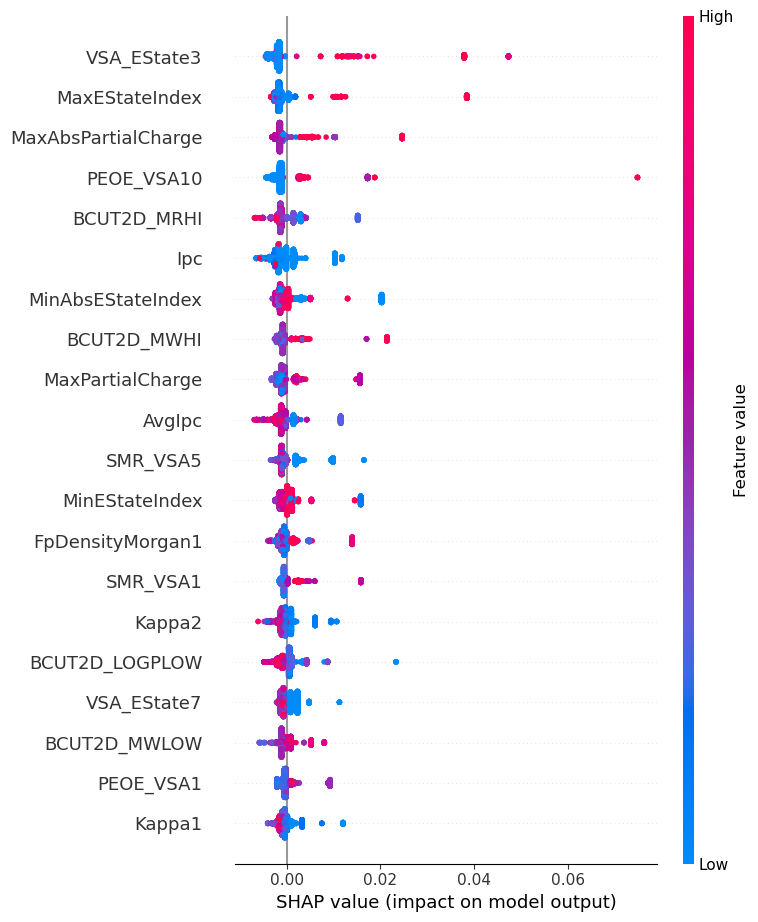

In [15]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 97].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# sod

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: sod, Length: 4697, dtype: object

sod
False    4395
True      302
Name: count, dtype: int64

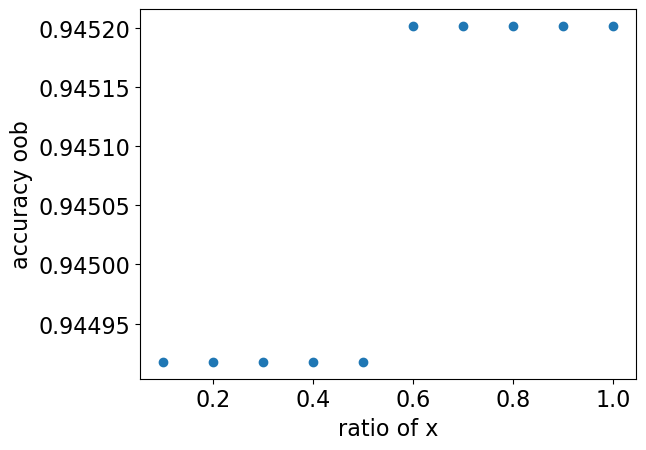

最適なx: 0.6


importance
MaxEStateIndex       0.009421
MinAbsEStateIndex    0.038974
MinEStateIndex       0.013329
qed                  0.005966
SPS                  0.010072
...                       ...
fr_Ndealkylation2    0.001015
fr_bicyclic          0.000255
fr_piperdine         0.001185
fr_quatN             0.000547
fr_unbrch_alkane     0.003427

[68 rows x 1 columns]

False  True
False   3293     3
True     181    45

False  True
False   1095     4
True      65    11

正解率(Accuracy) : 訓練 0.9477569562748438, 検証 0.9412765957446808
適合率(Precision) : 訓練 0.9375, 検証 0.7333333333333333
再現率(Recall) : 訓練 0.19911504424778761, 検証 0.14473684210526316
F1スコア : 訓練 0.3284671532846715, 検証 0.24175824175824176


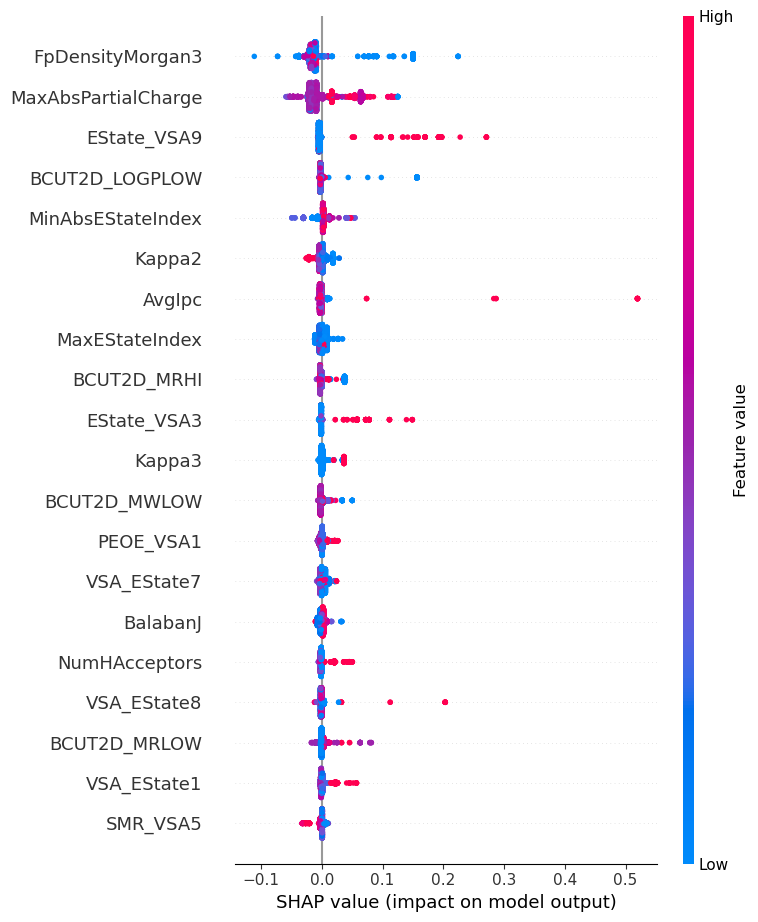

In [16]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 98].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# gme

249      False
250      False
251       True
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: gme, Length: 4697, dtype: object

gme
False    4529
True      168
Name: count, dtype: int64

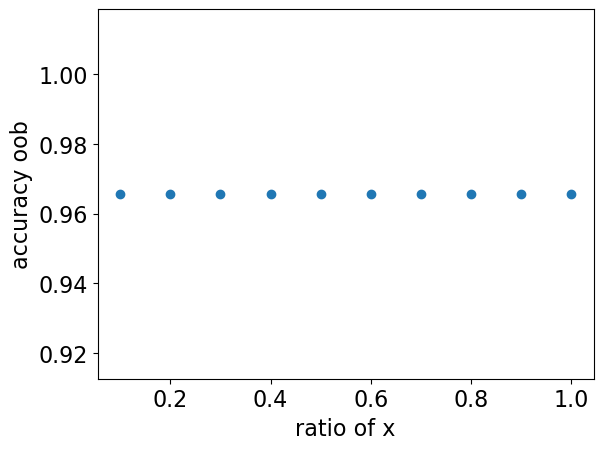

最適なx: 0.1


importance
MaxEStateIndex       0.044957
MinAbsEStateIndex    0.015133
MinEStateIndex       0.016000
qed                  0.013315
SPS                  0.009258
...                       ...
fr_Ndealkylation2    0.005176
fr_bicyclic          0.000270
fr_piperdine         0.008477
fr_quatN             0.005794
fr_unbrch_alkane     0.000342

[68 rows x 1 columns]

False  True
False   3395     1
True     120     6

False  True
False   1132     1
True      40     2

正解率(Accuracy) : 訓練 0.9656445201590006, 検証 0.9651063829787234
適合率(Precision) : 訓練 0.8571428571428571, 検証 0.6666666666666666
再現率(Recall) : 訓練 0.047619047619047616, 検証 0.047619047619047616
F1スコア : 訓練 0.09022556390977443, 検証 0.08888888888888889


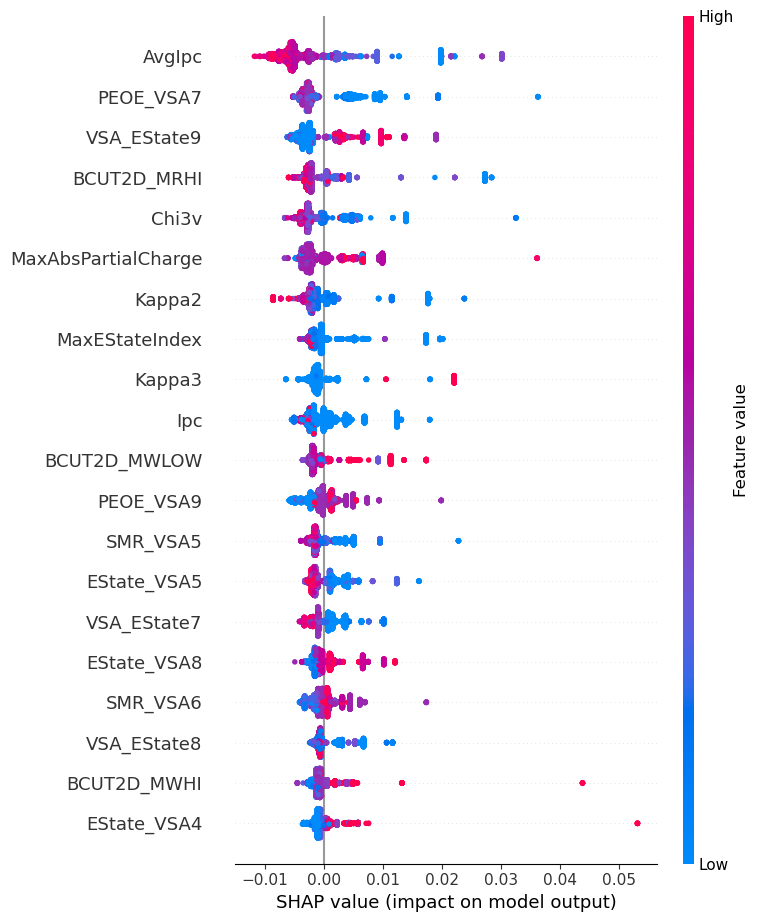

In [17]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 99].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# pau

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: pau, Length: 4697, dtype: object

pau
False    4671
True       26
Name: count, dtype: int64

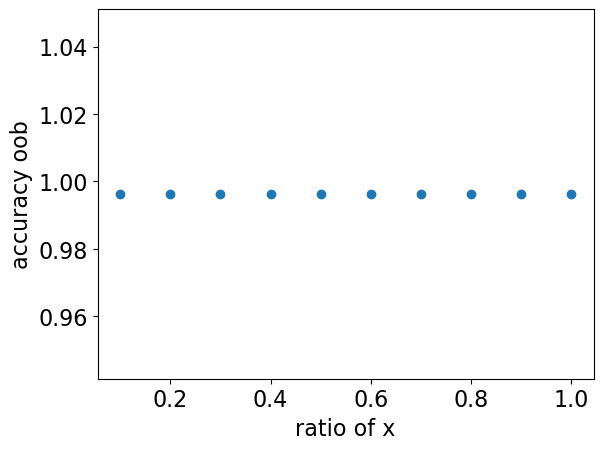

最適なx: 0.1


importance
MaxEStateIndex       0.016660
MinAbsEStateIndex    0.018078
MinEStateIndex       0.018734
qed                  0.010996
SPS                  0.038763
...                       ...
fr_Ndealkylation2    0.000272
fr_bicyclic          0.009654
fr_piperdine         0.000407
fr_quatN             0.010212
fr_unbrch_alkane     0.000000

[68 rows x 1 columns]

False  True
False   3500     3
True      10     9

C:\Users\yamamoto02\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


False  True
False   1168     0
True       7     0

正解率(Accuracy) : 訓練 0.9963089153889836, 検証 0.9940425531914894
適合率(Precision) : 訓練 0.75, 検証 0.0
再現率(Recall) : 訓練 0.47368421052631576, 検証 0.0
F1スコア : 訓練 0.5806451612903226, 検証 0.0


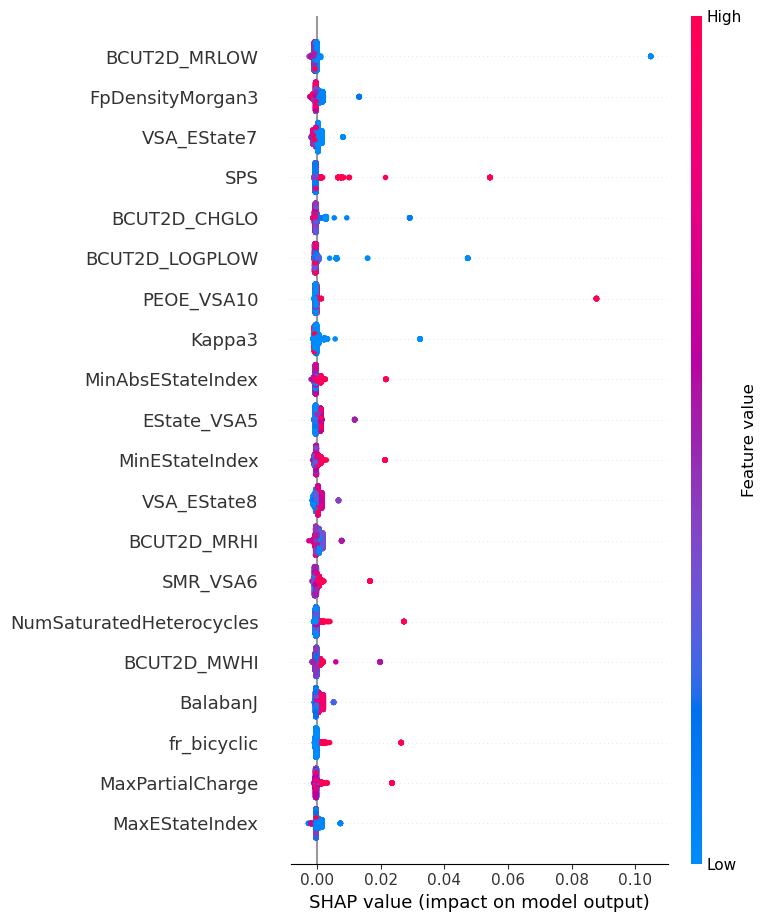

In [18]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 100].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# lta

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: lta, Length: 4697, dtype: object

lta
False    4577
True      120
Name: count, dtype: int64

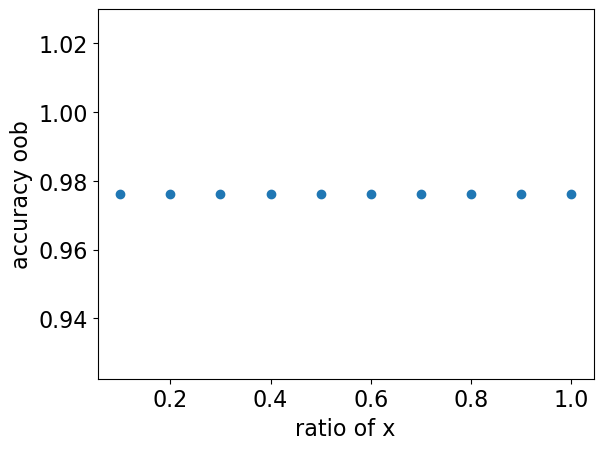

最適なx: 0.1


importance
MaxEStateIndex       0.017804
MinAbsEStateIndex    0.009704
MinEStateIndex       0.010293
qed                  0.011732
SPS                  0.013360
...                       ...
fr_Ndealkylation2    0.000005
fr_bicyclic          0.000949
fr_piperdine         0.000041
fr_quatN             0.009278
fr_unbrch_alkane     0.000742

[68 rows x 1 columns]

False  True
False   3431     1
True      81     9

False  True
False   1143     2
True      30     0

正解率(Accuracy) : 訓練 0.97671777399205, 検証 0.9727659574468085
適合率(Precision) : 訓練 0.9, 検証 0.0
再現率(Recall) : 訓練 0.1, 検証 0.0
F1スコア : 訓練 0.18, 検証 0.0


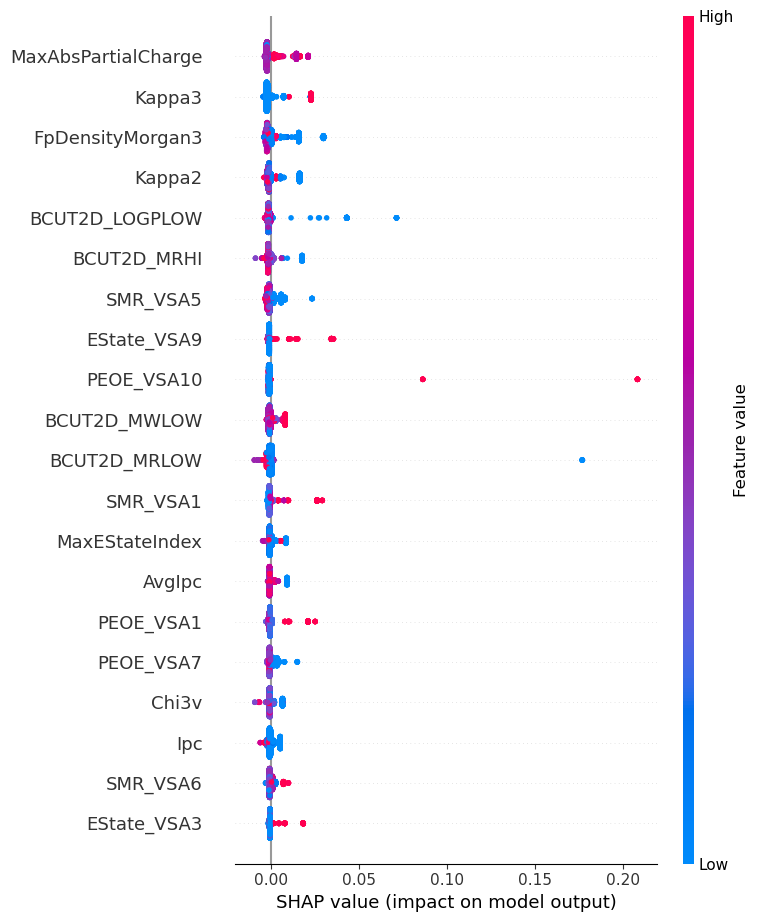

In [19]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 101].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)

# jbw

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: jbw, Length: 4697, dtype: object

jbw
False    4148
True      549
Name: count, dtype: int64

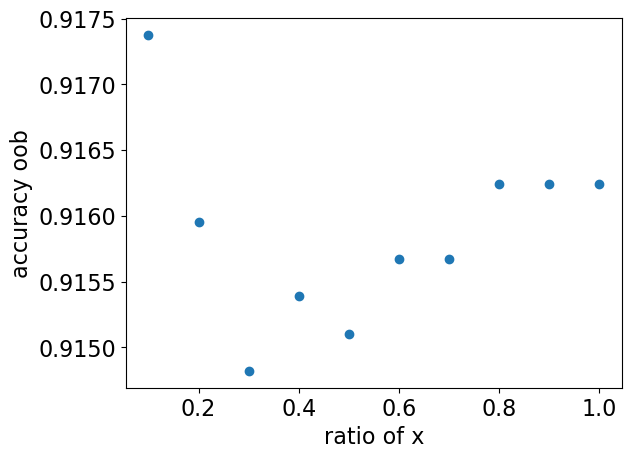

最適なx: 0.1


importance
MaxEStateIndex       0.025943
MinAbsEStateIndex    0.025211
MinEStateIndex       0.030790
qed                  0.016662
SPS                  0.045638
...                       ...
fr_Ndealkylation2    0.000982
fr_bicyclic          0.002743
fr_piperdine         0.002192
fr_quatN             0.010155
fr_unbrch_alkane     0.007644

[68 rows x 1 columns]

False  True
False   3024    86
True     161   251

False  True
False    995    43
True      53    84

正解率(Accuracy) : 訓練 0.9298693923906871, 検証 0.9182978723404255
適合率(Precision) : 訓練 0.744807121661721, 検証 0.6614173228346457
再現率(Recall) : 訓練 0.6092233009708737, 検証 0.6131386861313869
F1スコア : 訓練 0.6702269692923899, 検証 0.6363636363636364


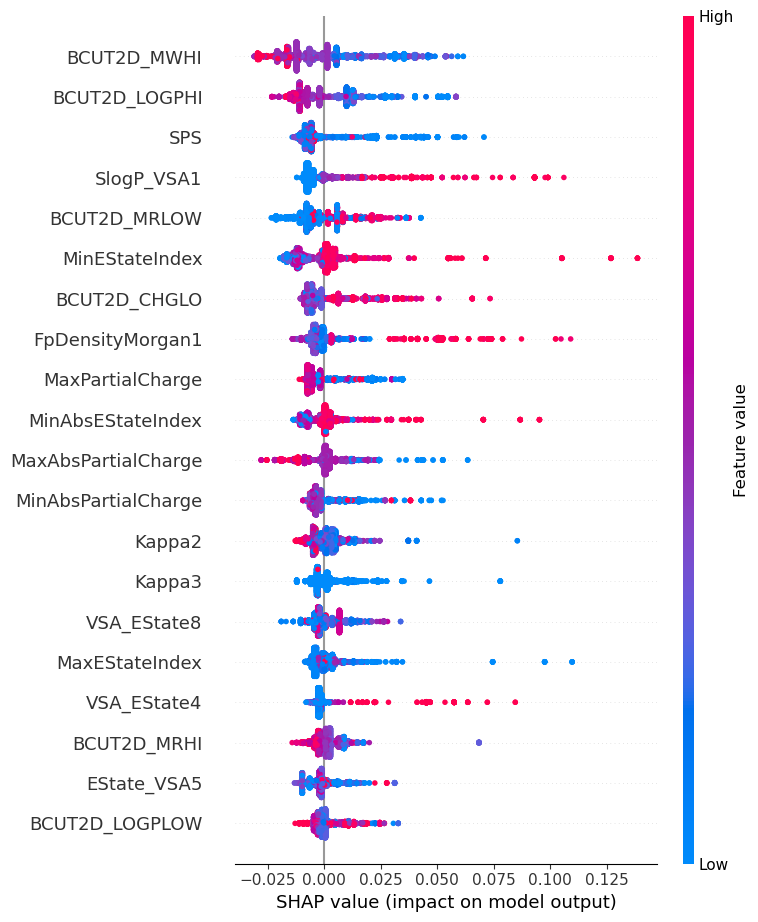

In [20]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU_jbw.csv', index_col=0, header=0)
x=dataset.iloc[:, 8:76]
y=dataset.iloc[:, 102].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train)